In [1]:
# This is a set of scripts to explore a MVPA analysis with Smith and Wang
# Python 2
# First thing is importing the libraries and change directories
import nilearn
from nilearn import datasets,image,masking,signal,plotting,input_data
import numpy as np
import pandas as pd
import sklearn as skl
import os
import matplotlib.pyplot as plt
import itertools
os.chdir('../')

/usr/local/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Python2 support is deprecated and will be removed in a future release. Consider switching to Python3.
  after removing the cwd from sys.path.
/usr/local/anaconda2/lib/python2.7/site-packages/sklearn/utils/graph.py:15: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .graph_shortest_path import graph_shortest_path  # noqa
/usr/local/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:35: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ..utils.seq_dataset impo

In [2]:
#We also need to pull the data into an easily readable format I've chosen to us a dataframe

#List of z_images
func_list=[]
label_list=[]
#We create a subject lis based on the name of the folders below "data" psuedo-following bids allows this to work well

sublist=os.listdir('data')
print(sublist)
# We will create a list of dataframes which will later be concatenated together
# !! Please note this means you must re-index the dataframe, otherwise multiple rows will have the same index

df_list=[]
for i,sub in enumerate(sublist):
    current_df = pd.read_csv('data/%s/%s_labels.csv'%(sub,sub),sep='\t')
    current_df.drop(columns=[u'Unnamed: 0'],inplace=True)
    #we append in a seperate list with the names of the images we want to read in order later
    func_list.append('data/%s/%s_func.nii.gz'%(sub,sub))
    current_df.columns=['trial','deck','feedback','miss','type','run']
    current_df['high_low']=current_df.apply(lambda row: np.greater(row['feedback'],2.5),axis=1 )
    current_df['quantile']=pd.qcut(current_df['feedback'].astype(float),4,labels=False)
    current_df['quantile']=current_df['quantile']+1
    current_df['sub']=sub
    current_df['func_file']=func_list[i]
    print(current_df.iloc[0])
    #We append the list with the new data frame
    df_list.append(current_df)
#Concatenate all of the lists together here
behavior_df=pd.concat(df_list)
display(behavior_df.groupby(by='sub').mean())
print(func_list)
#We import one large 4d image to hold in memory to reduce time later on
#importing new images takes a lot of time so doing it subs*tests is a lot
func_total=nilearn.image.concat_imgs(func_list)
# We reset the index of the dataframe so that the index of each row matches the index of the 4d 'func_total'
behavior_df.reset_index(inplace=True)
display(behavior_df)

['sub-119', 'sub-118', 'sub-107', 'sub-113', 'sub-106', 'sub-112', 'sub-125', 'sub-123', 'sub-108', 'sub-111', 'sub-115', 'sub-117', 'sub-120', 'sub-116', 'sub-114', 'sub-109', 'sub-121', 'sub-122', 'sub-104', 'sub-110']
trial                                       1
deck                                        1
feedback                                    3
miss                                        0
type                                        a
run                                         1
high_low                                 True
quantile                                    3
sub                                   sub-119
func_file    data/sub-119/sub-119_func.nii.gz
Name: 0, dtype: object
trial                                       1
deck                                        2
feedback                                    2
miss                                        0
type                                        i
run                                         1
high_low            

,trial,deck,feedback,miss,run,high_low,quantile
sub,,,,,,,
sub-104,20.5,1.5,2.266802,0.00625,2.5,0.36875,2.36875
sub-106,20.5,1.5,2.157056,0.01250,2.5,0.33750,2.28750
sub-107,20.5,1.5,2.042930,0.07500,2.5,0.29375,2.30000
sub-108,20.5,1.5,2.171495,0.08750,2.5,0.34375,2.31875
sub-109,20.5,1.5,1.948780,0.11875,2.5,0.27500,2.36875
sub-110,20.5,1.5,2.177176,0.05625,2.5,0.31250,2.33125
sub-111,20.5,1.5,2.188496,0.01250,2.5,0.35625,2.36875
sub-112,20.5,1.5,2.231569,0.01875,2.5,0.34375,2.38125
sub-113,20.5,1.5,2.135176,0.03125,2.5,0.31250,2.27500


['data/sub-119/sub-119_func.nii.gz', 'data/sub-118/sub-118_func.nii.gz', 'data/sub-107/sub-107_func.nii.gz', 'data/sub-113/sub-113_func.nii.gz', 'data/sub-106/sub-106_func.nii.gz', 'data/sub-112/sub-112_func.nii.gz', 'data/sub-125/sub-125_func.nii.gz', 'data/sub-123/sub-123_func.nii.gz', 'data/sub-108/sub-108_func.nii.gz', 'data/sub-111/sub-111_func.nii.gz', 'data/sub-115/sub-115_func.nii.gz', 'data/sub-117/sub-117_func.nii.gz', 'data/sub-120/sub-120_func.nii.gz', 'data/sub-116/sub-116_func.nii.gz', 'data/sub-114/sub-114_func.nii.gz', 'data/sub-109/sub-109_func.nii.gz', 'data/sub-121/sub-121_func.nii.gz', 'data/sub-122/sub-122_func.nii.gz', 'data/sub-104/sub-104_func.nii.gz', 'data/sub-110/sub-110_func.nii.gz']


,index,trial,deck,feedback,miss,type,run,high_low,quantile,sub,func_file
0,0,1.0,1.0,3.0,0.0,a,1,True,3,sub-119,data/sub-119/sub-119_func.nii.gz
1,1,2.0,1.0,1.0,0.0,a,1,False,1,sub-119,data/sub-119/sub-119_func.nii.gz
2,2,3.0,1.0,2.0,0.0,a,1,False,2,sub-119,data/sub-119/sub-119_func.nii.gz
3,3,4.0,1.0,2.0,0.0,a,1,False,2,sub-119,data/sub-119/sub-119_func.nii.gz
4,4,5.0,1.0,2.0,0.0,a,1,False,2,sub-119,data/sub-119/sub-119_func.nii.gz
5,5,6.0,1.0,3.0,0.0,a,1,True,3,sub-119,data/sub-119/sub-119_func.nii.gz
6,6,7.0,1.0,2.0,0.0,a,1,False,2,sub-119,data/sub-119/sub-119_func.nii.gz
7,7,8.0,1.0,1.0,0.0,a,1,False,1,sub-119,data/sub-119/sub-119_func.nii.gz
8,8,9.0,1.0,3.0,0.0,a,1,True,3,sub-119,data/sub-119/sub-119_func.nii.gz
9,9,10.0,1.0,2.0,0.0,a,1,False,2,sub-119,data/sub-119/sub-119_func.nii.gz


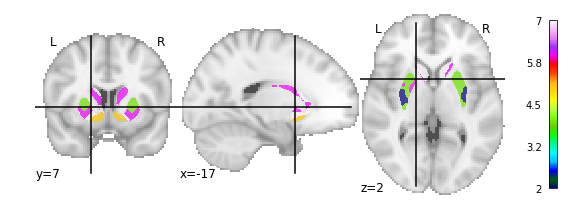

In [3]:
#We use the 7 area choi atlas
atlas_name='code/Choi_JNeurophysiol12_MNI152/Choi2012_7Networks_MNI152_FreeSurferConformed1mm_TightMask.nii.gz'
choi=image.load_img(atlas_name)
choi_list=[]
#Here we are turning the choi atlas based on intensity into a list of images where each intensity
# is a seperate image
func=image.load_img(func_list[0])
mean_img=image.image.mean_img(func)
for index in range(7):
    current_area=image.math_img('img==%s'%(index+1),img=choi)
    resampled_area=image.resample_to_img(current_area,mean_img,interpolation='linear')
    choi_list.append(resampled_area)
    
choi_maps=image.concat_imgs(choi_list)
choi_maps.to_filename("choi_atlas_4d.nii.gz")
#just plotting the atlas so we have an idea of what things look like
plotting.plot_roi(atlas_name,colorbar=True)
plt.show()

#make a list of masker objects to loop through later
mask_list=[]
for img in choi_list:
    
    mask=input_data.NiftiMasker(mask_img=img)
    mask_list.append(mask)
#make a list of 4d data images relating to each area of the 4d choi atlas
masked_img_data=[]
for current_masker in mask_list:
    masked_img_data.append(current_masker.fit_transform(func_total))

In [ ]:
#importing a few things I forgot earlier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
#setting up an "accuracy dataframe to help organize the accuracies by test, mask , and subject"
columns=['Asana_test','Train_Test','mask','sub','Accuracy']
asana_df=pd.DataFrame(columns=columns)
#setting the classifier object
svc=SVC(C=0.001,kernel='linear',class_weight='balanced')
all_cm=[]

# The loop starts with Asana Test-> Area -> Train_Test scheme -> Subject
# Using itertools to loop through all of the combinations 1v2,1v3,1v4,2v3,2v4,3v4
for test in list(itertools.combinations(['1','2','3','4'],2)):
    #Everythin in this indent is in the same test
    print("The current Test is classifying feedbacks levels", test[0],test[1])
    mask_cm=[]
    for mask_ind,mask in enumerate(mask_list):
        #everything at this indent is in the same mask
        print("The current area is area",mask_ind)
        #The data already exists remember? Nice now we don't have to wait for it to load on each loop
        X=masked_img_data[mask_ind]
        plotting.plot_roi(roi_img=mask.mask_img_,draw_cross=False)
        plt.show()
        tr_cm=[]
        for tr_te_ind,tr_test in enumerate(list(itertools.product(['a','i'],repeat=2))):
            #Everything at this indent is on the same Training scheme
            tr_type=tr_test[0]
            te_type=tr_test[1]
            print("Training Type: "+tr_test[0]+" Testing: "+tr_test[1])
            y_true=[]
            y_pred=[]
            
            scores=[]
            df_list=[]
            for sub in behavior_df['sub'].unique():
                #Everything her is the same subject fold
                train_subs=[x for x in behavior_df['sub'].unique() if x != sub]
                train_index=behavior_df.index[(
                    behavior_df['sub'].isin(train_subs) & 
                    behavior_df['quantile'].isin([test[0],test[1]]) &
                    behavior_df['type'].isin([tr_type]))].tolist()
        
                test_index=behavior_df.index[(
                    behavior_df['sub'].isin([sub]) & 
                    behavior_df['quantile'].isin([test[0],test[1]])&
                    behavior_df['type'].isin([te_type]))].tolist()
            
                Y_train=behavior_df.iloc[train_index]
                X_train=X[train_index]
            
                Y_test=behavior_df.iloc[test_index]
                X_test=X[test_index]
                
                svc.fit(X_train,Y_train['quantile'].values)
                acc=svc.score(X_test,Y_test['quantile'].values)
                scores.append(acc)
                
                y_true.append(Y_test['quantile'].values)
                y_pred.append(svc.predict(X_test))
                
                row=[test[0]+'v'+test[1],'Tr'+tr_type+'_Te'+te_type,mask_ind,sub,acc]
                df_list.append(row)
            print np.mean(scores)
            part_df=pd.DataFrame(df_list,columns=columns)
            asana_df=asana_df.append(part_df)
            tr_cm.append(confusion_matrix(y_true=np.concatenate(y_true),y_pred=np.concatenate(y_pred)))
            print tr_cm[tr_te_ind]
            sns.heatmap(tr_cm[tr_te_ind],annot=True, cmap="YlGnBu")
            plt.show()
        mask_cm.append(tr_cm)
    all_cm.append(mask_cm)
    plt_data=asana_df[asana_df['Asana_test']==test[0]+'v'+test[1]]
    sns.barplot(x="Train_Test",y="Accuracy",hue="mask",data=plt_data)
    plt.show()
            
        
asana_df.to_csv('Asana_test_acc2.tsv','sep=\t')

In [22]:
asana_df.to_csv('Asana_test_acc.tsv',sep='\t')